In [24]:
!pip install 'gymnasium[atari, accept-rom-licesnse]'
!pip install 'stable-baselines3[extra]'

  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.3.0
    Uninstalling Shimmy-1.3.0:
      Successfully uninstalled Shimmy-1.3.0
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 0.2.1
    Uninstalling Shimmy-0.2.1:
      Successfully uninstalled Shimmy-0.2.1


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from gymnasium.wrappers import GrayScaleObservation
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import CheckpointCallback

2024-06-12 00:32:44.160706: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 00:32:45.053224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
env = gym.make("ALE/AirRaid-v5", render_mode='human')

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [3]:
env.action_space

Discrete(6)

In [4]:
# Visualizing the game environment
terminated = True

for _ in range(10):
    
    if terminated:
        env.reset()
        
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    print(np.sum(observation))
    env.render()
    
env.close()

4805304
4805304
4812552


/home/mayank/anaconda3/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


4805760
4805760
4810704
4805760
4807608
4812552
4807608


In [5]:
# Preprocess the data

# 1. Converting RGB to Grayscale
env = GrayScaleObservation(env, keep_dim = True)
env.observation_space

Box(0, 255, (250, 160, 1), uint8)

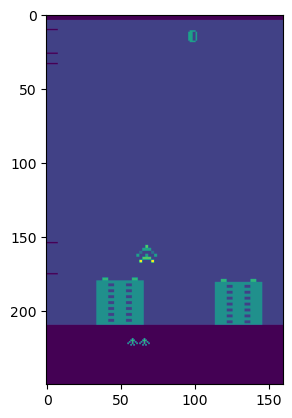

In [6]:
state = env.reset()
plt.imshow(state[0])

In [7]:
# 2. Vectorizing the environment
env = DummyVecEnv([lambda: env])

# 3. FrameStacking
env = VecFrameStack(env, 4, "last")

In [8]:
state = env.reset()
for _ in range(4):
    state = env.step([env.action_space.sample()])
state[0].shape

(1, 250, 160, 4)

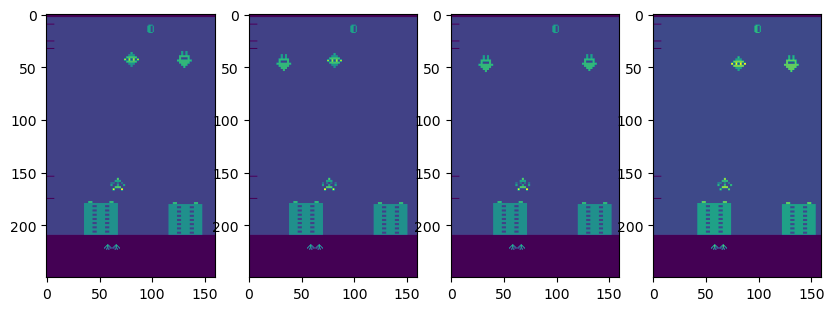

In [9]:
# After FrameStacking
plt.figure(figsize=(10,8))
for i in range(state[0].shape[3]):
    plt.subplot(1, 4, i+1)
    plt.imshow(state[0][0][:,:,i])
plt.show()

In [ ]:
checkpoint_callback = CheckpointCallback(
    save_freq = 10000,
    save_path = "./logs/",
    name_prefix = "RL_Model",
    save_replay_buffer = True,
    save_vecnormalize = True,
)

model = DQN("CnnPolicy", env, learning_rate= 0.000001,buffer_size = 20000,batch_size = 64, verbose = 1)
Trained = model.learn(total_timesteps=1000000, progress_bar = True)

Using cuda device
Wrapping the env in a VecTransposeImage.


Output()

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 12       |
|    time_elapsed     | 237      |
|    total_timesteps  | 2962     |
| train/              |          |
|    learning_rate    | 1e-06    |
|    loss             | 1.16     |
|    n_updates        | 715      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 15       |
|    time_elapsed     | 331      |
|    total_timesteps  | 5034     |
| train/              |          |
|    learning_rate    | 1e-06    |
|    loss             | 1.55     |
|    n_updates        | 1233     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [15]:
Trained.save("first_1mil")

In [16]:
model = DQN.load("./logs/first_1mil.zip")

/home/mayank/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/home/mayank/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, info = env.step(action)
    if terminated:
        obs = env.reset()
        break
    env.render()